In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Parameters / 参数设置
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initialization / 初始化
p  = numpy.zeros((ny, nx))
pd = numpy.zeros((ny, nx))
b  = numpy.zeros((ny, nx))
x  = numpy.linspace(xmin, xmax, nx)
y  = numpy.linspace(xmin, xmax, ny)

# Source / 源
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

> With that, we are ready to advance the initial guess in pseudo-time. How is the code below different from the function used in Step 9 to solve Laplace's equation?

有了这些，我们就可以在伪时间内推进初始猜测了。下面的代码与步骤9中用于解决拉普拉斯方程的函数有什么不同？

In [3]:
for it in range(nt):
    pd = p.copy()

    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 +
                    (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -
                    b[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))

    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

> Maybe we could reuse our plotting function from Step 9, don't you think?

也许我们可以重新使用步骤9中的绘图函数，你认为呢？

In [4]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

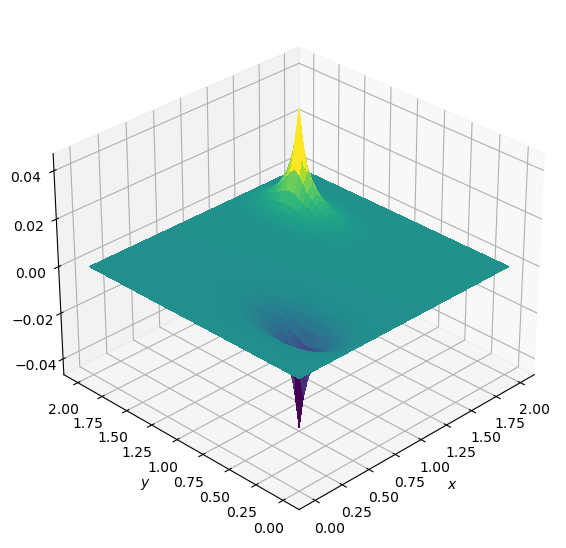

In [5]:
plot2D(x,y,p)

> Ah! The wonders of code reuse! Now, you probably think: "Well, if I've written this neat little function that does something so useful, I want to use it over and over again. How can I do this without copying and pasting it each time? —If you are very curious about this, you'll have to learn about packaging. But this goes beyond the scope of our CFD lessons. You'll just have to Google it if you really want to know.

啊！代码重用的奇妙之处 现在，你可能会想："好吧，如果我写了这个整洁的小函数，做了一些非常有用的事情，我想反复使用它。我怎样才能做到这一点，而不需要每次都复制和粘贴它呢？-如果你对此非常好奇，你就得学习一下打包。但这已经超出了我们CFD课程的范围。如果你真的想知道的话，你只能通过谷歌来了解。